[Unsupervised Learning By Cornell University](https://kuleshov-group.github.io/aml-book/contents/lecture8-unsupervised-learning.html)

In [13]:
# import libraries
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn import cluster

plt.rcParams['figure.figsize'] = [12, 4]


In [2]:
# Load the Iris dataset
iris = datasets.load_iris()

# Print out the description of the dataset
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

Text(0.5, 1.0, 'Dataset of Iris flowers')

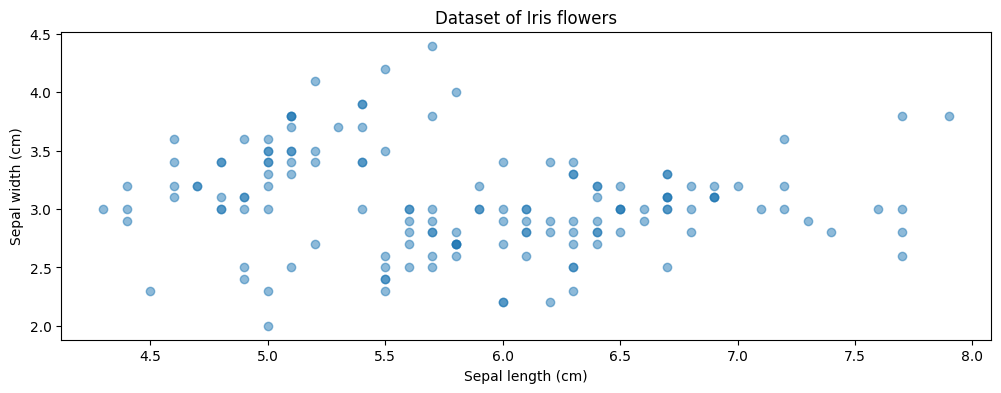

In [ ]:
# Visualize the Iris flower dataset
# iris.data[:,0] is the sepal length, while iris.data[:,1] is the sepal width 
plt.scatter(iris.data[:,0], iris.data[:,1], alpha=0.5)
plt.ylabel("Sepal width (cm)")
plt.xlabel("Sepal length (cm)")
plt.title("Dataset of Iris flowers")

In [14]:
# fit K-Means with K=3
model = cluster.KMeans(n_clusters=3)
model.fit(iris.data[:,[0,1]])

KMeans(n_clusters=3)

The output of K-means are K cluster centroids: these are just points in the space of X. `model.cluster_centers_` is a `Kxd` dimential array, with `K` is the number of clusters specified by `cluster.KMeans(n_clusters=3)` and `d` is the nubmber of numeric features/attributes in each data point $x^{(i)} \in R^d$. Each data point is a vector of `d` attributes or features. 

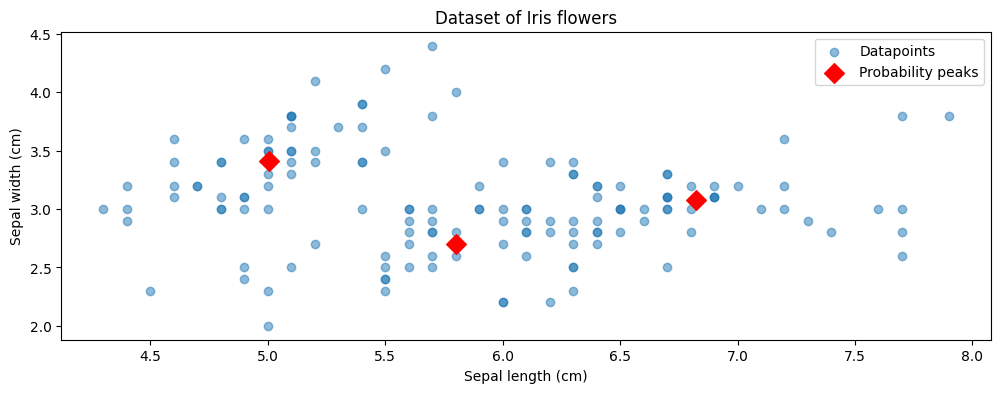

In [16]:
# visualize the datapoints
plt.scatter(iris.data[:,0], iris.data[:,1], alpha=0.5)
# visualize the learned clusters with red markers
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker='D', c='r', s=100)
plt.ylabel("Sepal width (cm)")
plt.xlabel("Sepal length (cm)")
plt.title("Dataset of Iris flowers")
plt.legend(['Datapoints', 'Probability peaks'])

In [18]:
model.cluster_centers_

array([[5.8       , 2.7       ],
       [5.00392157, 3.40980392],
       [6.82391304, 3.07826087]])

It would be helpful to understand whether the centroids provided to us by 
-means have been able to discover interesting structure in this unlabeled dataset. One way in which we could do this in this example is by leveraging the class labels, which we have originally discarded.
The figure below colors each datapoint according to its true class (which was not available to the 
-means algorithm).

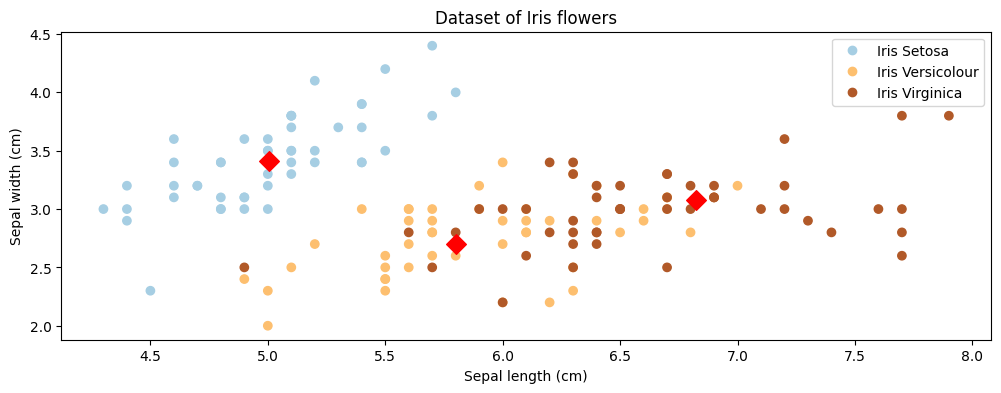

In [ ]:
# visualize datapoints belonging to different classes with colors
p1 = plt.scatter(iris.data[:,0], iris.data[:,1], alpha=1, c=iris.target, cmap='Paired')
# visualize the learned cluster with red markers
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker='D', c='r', s=100)
plt.ylabel("Sepal width (cm)")
plt.xlabel("Sepal length (cm)")
plt.title("Dataset of Iris flowers")
plt.legend(handles=p1.legend_elements()[0], labels=['Iris Setosa', 'Iris Versicolour', 'Iris Virginica'])

# Interestingly, we find that the centroids approximately correspond to the three classes of flowers present in the dataset! The K-means algorithm was able to discover these without using any labels.

In [ ]:
# import libraries
import numpy as np
from sklearn import datasets
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]

# sklearn.datasets.make_blobs() Generate isotropic Gaussian blobs for clustering.

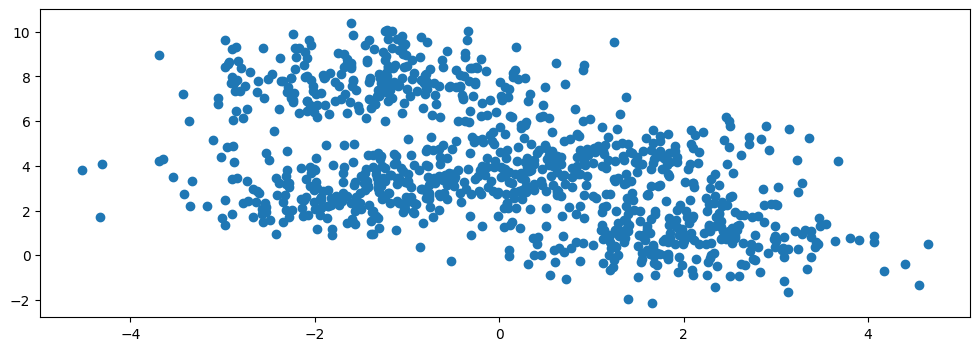

In [33]:
# Setting the seed makes the random module of numpy deterministic across different runs of the program
np.random.seed(0)
# Generate random 2D datapoints using 4 different Gaussians.
X, y = datasets.make_blobs(n_samples=1000, centers=4)

plt.scatter(X[:,0], X[:,1])

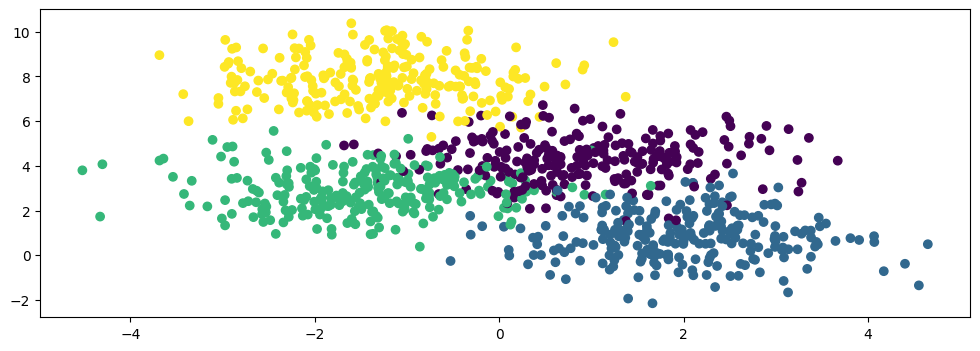

In [34]:
# We know the true labels of these clusters, i.e., which Gaussian a datapoint is generated by, so we can visualize them with different colors 
plt.scatter(X[:,0], X[:,1], c=y)

In supervised learning, underfitting occurs when our model is too simple to fit the data. Similarly, in unsupervised learning, underfitting happens when we are not able to fully learn the signal present in the data. In the context of K-Means, this means our is lower than the actual number of clusters in the data.

In [35]:
# fit a K-Means
from sklearn import cluster
model = cluster.KMeans(n_clusters=2)
model.fit(X)

KMeans(n_clusters=2)

The centroids find two distinct components (or clusters) in the data, but they fail to capture the true structure.

Below, we visualize both the datapoints and the learned clusters. You can see that more than one true cluster (represented by different colors) is associated to a learned cluster.

K-Means Objective: 4736.68


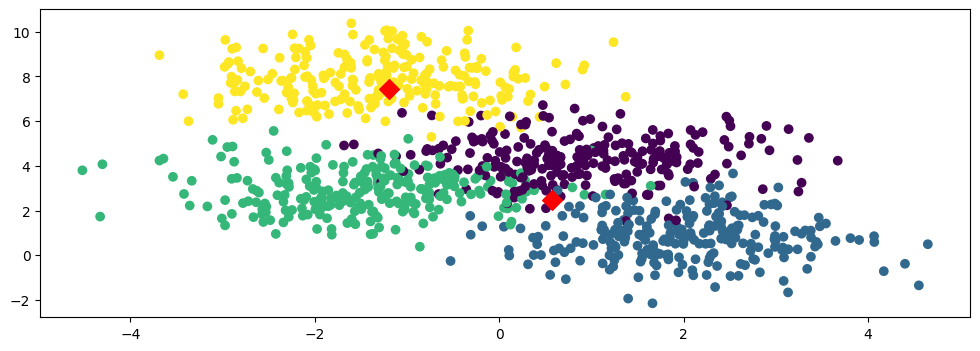

In [36]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker='D', c='r', s=100)
print('K-Means Objective: %.2f' % -model.score(X))

Overfitting happens when we fit the noise, but not the signal. In our example, this means fitting small, local noise clusters rather than the true global clusters.

K-Means Objective: 172.91


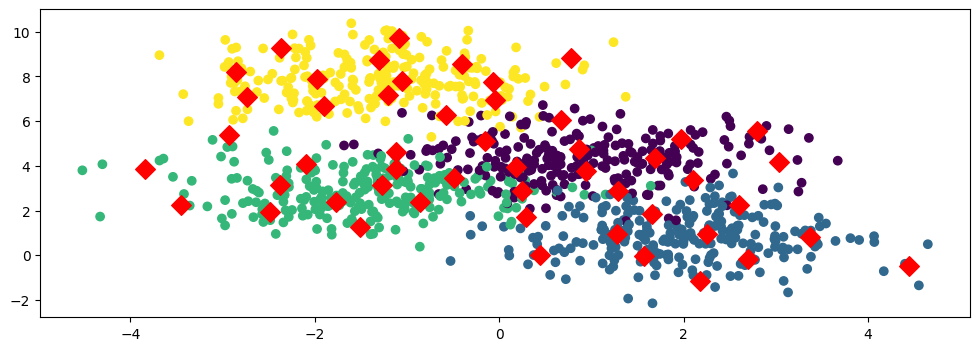

In [ ]:
# Setting K = 50
model = cluster.KMeans(n_clusters=50)

# Fit K-means
model.fit(X)
# Visualize both the datapoints and the learned clusters
plt.scatter(X[:,0], X[:,1], c=y)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker='D', c='r', s=100)
print(f'K-Means Objective: {-model.score(X):.2f}')

# score(X, y=None, sample_weight=None) returns the opposite of the value of X on the K-means objective.

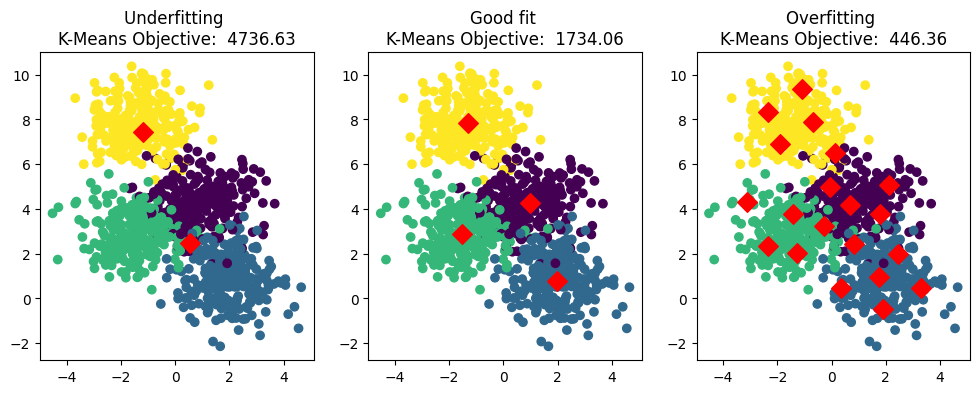

In [56]:
# we visualize examples of underfitting, a good fit, and overfitting in the context of our running example with K-means.
Ks, titles = [2, 4, 20], ['Underfitting', 'Good fit', 'Overfitting']

f, axes = plt.subplots(1,3)
for k, title, ax in zip(Ks, titles, axes):
    model = cluster.KMeans(n_clusters=k)
    model.fit(X)
    ax.scatter(X[:,0], X[:,1], c=y)
    ax.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker='D', c='r', s=100)
    ax.set_title(f'{title} \nK-Means Objective:  {-model.score(X):.2f}')

The elbow method is a useful heuristic that can be used to tune hyper-parameters in unsupervised learning, e.g., choosing for K-means. The elbow method works as follows:
1. We plot the objective function as a function of the hyper-parameter .
2. The “elbow” of the curve happens when its rate of decrease substantially slows down.
3. The “elbow’ is a good guess for the hyperparameter.

Text(0, 0.5, 'Objective Function Value')

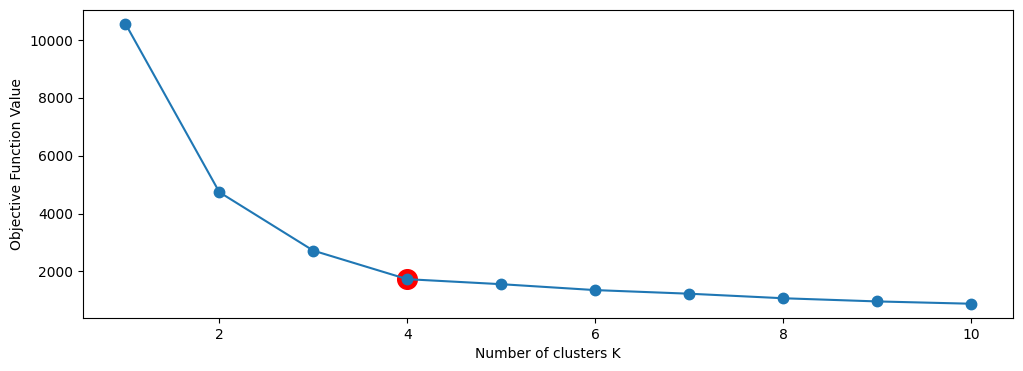

In [57]:
Ks, objs = range(1,11), []
for k in Ks:
    model = cluster.KMeans(n_clusters=k)
    model.fit(X)
    objs.append(-model.score(X))

plt.plot(Ks, objs, '.-', markersize=15)
plt.scatter([4], [objs[3]], s=200, c='r')
plt.xlabel("Number of clusters K")
plt.ylabel("Objective Function Value")

Reducing Overfitting
Choosing hyper-parameters via the elbow method is one thing you can do to avoid overfitting. In general, there are multiple ways to control overfitting including:
1. Reduce model complexity (e.g., reduce in K-Means)
2. Penalize complexity in the objective (e.g., penalize large )
3. Use a probabilistic model and regularize it.